In [8]:
#importing libs for input the data and preprocessing and scaling
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#input data to a dataframe
data = pd.read_csv('Salary_Data.csv')

In [9]:
#show data deltail info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
import numpy as np

X = data['YearsExperience']
Y = data['Salary']
X =  X[:,np.newaxis]

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#do a grid search to find best parameters for SVR
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X,Y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [13]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [14]:
#creating model with SVR
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,Y)

SVR(C=100000, gamma=0.005)

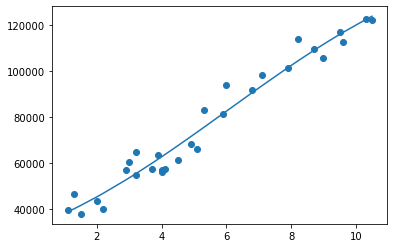

In [15]:
import matplotlib.pyplot as plt 
plt.scatter(X,Y)
plt.plot(X, model_baru.predict(X))